# Submitted by Tarang Ranpara (202011057)

## preparing the data 

In [1]:
! git clone https://github.com/rasoolims/nlp_hw_dep.git

Cloning into 'nlp_hw_dep'...
remote: Enumerating objects: 43, done.
remote: Total 43 (delta 0), reused 0 (delta 0), pack-reused 43
Unpacking objects: 100% (43/43), done.


In [2]:
! cp -r /content/nlp_hw_dep/src src
! cp -r /content/nlp_hw_dep/trees trees

In [3]:
! mkdir data

In [4]:
! python2 src/gen_vocab.py trees/train.conll data/vocabs

In [5]:
! python2 src/gen.py trees/train.conll data/train.data

100...200...300...400...500...600...700...800...900...1000...1100...1200...1300...1400...1500...1600...1700...1800...1900...2000...2100...2200...2300...2400...2500...2600...2700...2800...2900...done!


In [6]:
! python2 src/gen.py trees/dev.conll data/dev.data

100...200...300...400...500...600...700...800...900...1000...1100...1200...1300...1400...1500...1600...1700...done!


In [7]:
! python2 src/gen.py trees/test.conll data/test.data

100...200...300...400...500...600...700...800...900...1000...1100...1200...1300...1400...1500...1600...1700...1800...1900...2000...2100...2200...2300...2400...done!


In [8]:
# making a test set 
dev_data = '/content/data/dev.data'
test_data = '/content/data/test.data'

with open(dev_data, 'r') as dev_f:
    print(f'reading: {dev_data}')
    lines = dev_f.readlines()

    dev_lines =  lines[:len(lines)//2]
    test_lines = lines[len(lines)//2:]

    with open(test_data, 'w') as test_f:
        print(f'writing: {test_data}')
        test_f.writelines(test_lines)

with open(dev_data, 'w') as dev_f:
    print(f'writing: {dev_data}')
    dev_f.writelines(dev_lines)

reading: /content/data/dev.data
writing: /content/data/test.data
writing: /content/data/dev.data


## exploring the data

In [9]:
# checking train data format 
with open('data/train.data', 'r') as f:
    lines = f.readlines()
    print('#rows:', len(lines))
    for i in range(5):
        print(lines[i])
        print()

#rows: 143758
<root> <null> <null> <null> In an Oct. 19 <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <root> <null> <null> <null> IN DT NNP CD <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> SHIFT


In <root> <null> <null> an Oct. 19 review <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> IN <root> <null> <null> DT NNP CD NN <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> SHIFT


an In <root> <null> Oct. 19 review of <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> DT IN <root> <null> NNP CD NN IN <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <n

In [10]:
# checking train data format 
with open('data/dev.data', 'r') as f:
    lines = f.readlines()
    print('#rows:', len(lines))
    for i in range(5):
        print(lines[i])
        print()

#rows: 40033
<root> <null> <null> <null> Influential members of the <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <root> <null> <null> <null> JJ NNS IN DT <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> SHIFT


Influential <root> <null> <null> members of the House <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> JJ <root> <null> <null> NNS IN DT NNP <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> SHIFT


members Influential <root> <null> of the House Ways <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> NNS JJ <root> <null> IN DT NNP NNP <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <nu

In [11]:
# checking train data format 
with open('data/test.data', 'r') as f:
    lines = f.readlines()
    print('#rows:', len(lines))
    for i in range(5):
        print(lines[i])
        print()

#rows: 40033
inability for criticized <root> to maintain orderly markets their <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> NN IN VBN <root> TO VB JJ NNS PRP$ <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> poss <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> SHIFT


to inability for criticized maintain orderly markets during <null> their <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> TO NN IN VBN VB JJ NNS IN <null> PRP$ <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> poss <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> SHIFT


maintain to inability for orderly markets during the <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> VB TO NN IN JJ NNS IN DT <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null> <null>

In [12]:
# checking vocabs word format 
with open('data/vocabs.word', 'r') as f:
    lines = f.readlines()
    print('#rows:', len(lines))
    for i in range(5):
        print(lines[i])
        print()

#rows: 4807
limited 3629


Many 4174


consolidated 1158


magnetic 1159


demand 4421




In [13]:
# checking vocabs labels format 
with open('data/vocabs.labels', 'r') as f:
    lines = f.readlines()
    print('#rows:', len(lines))
    for i in range(5):
        print(lines[i])
        print()

#rows: 46
rroot 0


cc 1


number 2


ccomp 3


possessive 4




In [14]:
# checking vocabs actions format 
# in our implementation, we use only the part before colon 
with open('data/vocabs.actions', 'r') as f:
    lines = f.readlines()
    print('#rows:', len(lines))
    for i in range(5):
        print(lines[i])
        print()

#rows: 93
SHIFT 0


LEFT-ARC:rroot 1


LEFT-ARC:cc 2


LEFT-ARC:number 3


LEFT-ARC:ccomp 4




In [15]:
# checking vocabs pos format 
with open('data/vocabs.pos', 'r') as f:
    lines = f.readlines()
    print('#rows:', len(lines))
    for i in range(5):
        print(lines[i])
        print()

#rows: 45
PRP$ 0


VBG 1


VBD 2


<root> 3


VBN 4




## Dependancy Parsing 

In [16]:
import os
from tqdm import tqdm 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Concatenate

### Data Iterator

In [17]:
'''
  Taking these points in consideration:
    - The first 20 columns are for wordbased features.
    - The second 20 columns are for the POS-based features. 
    - The next 12 features are for dependency labels.
    - The last column shows the action.
'''
class DataSet(tf.keras.utils.Sequence):

    def __len__(self):
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, idx):

        # if batch_size = 32
        # idx = 0 -> indexes = idxs[0 : 32]
        # idx = 1 -> indexes = idxs[32 : 64]
        indexes = self.idxs[idx * self.batch_size : (idx + 1) * self.batch_size]
        
        # creating batch of 
        batch_x = np.array([self.data[k] for k in indexes])
        batch_y = np.array([self.action_labels[k] for k in indexes])
        
        # word, pos tag
        batch_x1, batch_x2 = batch_x[:, :4], batch_x[:, 4:]
        
        return (batch_x1, batch_x2), to_categorical(batch_y, num_classes=len(self.actions))

    # to read from vocabs.word
    def handle_vocab_mapping(self):
        with open(os.path.join(self.data_dir, "vocabs.word"), "r") as vocabs:
            for line in vocabs.readlines():
                word, id = line.split()
                id = int(id)

                self.vocab[word] = id
                self.rev_vocab[id] = word

    # to read from vocabs.pos
    def handle_pos_tag_mapping(self):
        with open(os.path.join(self.data_dir, "vocabs.pos"), "r") as vocabs:
            for line in vocabs.readlines():
                word, id = line.split()
                id = int(id)

                self.pos_tags[word] = id
                self.rev_pos_tags[id] = word

    # to define actions 
    def handle_actions(self):
        self.actions = {"SHIFT": 0, "LEFT-ARC": 1, "RIGHT-ARC": 2}
        self.rev_actions = {num: action for action, num in self.actions.items()}

    # gets value from dict for given list
    def _map(self, dct, lst, err):
        return [dct.get(i, dct.get(err)) for i in lst]

    # to read the {train/dev}.data
    def handle_data(self):
        with open(os.path.join(self.data_dir, f"{self.subset}.data"), "r") as data_file:
            for line in data_file.readlines():
                data_row = line.strip().split()
                word_feat, pos_tags_given, action_given = data_row[:20], data_row[20:40], data_row[-1]
                word_feat = self._map(self.vocab, word_feat, "<unk>")
                pos_tags_given  = self._map(self.pos_tags, pos_tags_given, "<null>")
                action_given = self.actions[action_given.split(":")[0]]

                #                 stack           buffer          pos                   buffer pos
                self.data.append(word_feat[:3] + [word_feat[4]] + pos_tags_given[0:3] + [pos_tags_given[4]])
                self.action_labels.append(action_given)
        print("Data loading: Done!")
    
    # constructor - the main processing unit
    def __init__(self, data_dir="data", subset="train", batch_size=1, shuffle=True):

        # directory that contains generated dataset
        self.data_dir = data_dir
        
        # train/dev
        self.subset = subset

        # batch size 
        self.batch_size = batch_size
        
        # flag: to decide whether to shuffle the data or not
        self.shuffle = shuffle

        # to be read from vocabs.word
        self.vocab = dict()
        self.rev_vocab = dict()

        # to be read from vocabs.pos
        self.pos_tags = dict()
        self.rev_pos_tags = dict()
        
        # representation for Shift, left arc, Right arc
        self.actions = dict()
        self.rev_actions = dict()

        # final data this loader holds 
        self.data = []

        # action names (processed: removing string after colon)
        self.action_labels = []

        # processing & loading the dataset 
        self._load_dataset()

        # logic for shuffling 
        self.on_epoch_end()

    def _load_dataset(self):
        self.handle_vocab_mapping()
        self.handle_pos_tag_mapping()
        self.handle_actions()
        self.handle_data()

    def on_epoch_end(self):
        self.idxs = np.arange(len(self.data))
        if self.shuffle:
            np.random.shuffle(self.idxs)

In [18]:
# Sanity check
loader = DataSet(
    data_dir="data", 
    subset="dev", 
    batch_size=32
)

print(len(loader))
batch_idx = 0

print(f'batch_x1[batch_idx = {batch_idx}]: {loader[batch_idx][0][0].shape}')
print(f'batch x2[batch_idx = {batch_idx}]: {loader[batch_idx][0][1].shape}')
print(f'batch_y[batch_idx  = {batch_idx}]: {loader[batch_idx][1].shape}')

Data loading: Done!
1251
batch_x1[batch_idx = 0]: (32, 4)
batch x2[batch_idx = 0]: (32, 4)
batch_y[batch_idx  = 0]: (32, 3)


### DP Model 

In [19]:
def DependencyParserModel(
    seq_len, 
    num_classes, 
    words_vocab_size, 
    pos_vocab_size, 
    embedding_dim=512, 
    lstm_units=256
    ):

    words = Input(shape=(seq_len,), name="words_input_1")
    pos_tags = Input(shape=(seq_len,), name="postag_input_2")
    
    concat = Concatenate(axis=-1)([
              Embedding(words_vocab_size, embedding_dim, name="words_embedding")(words), 
              Embedding(pos_vocab_size, embedding_dim, name="postag_embedding")(pos_tags)])

    bilstm_output = Bidirectional(LSTM(lstm_units))(concat)

    hidden_output_1 = Dense(128, activation="relu")(bilstm_output)
    hidden_output_2 = Dense(64, activation="relu")(hidden_output_1)

    output = Dense(num_classes, activation="softmax")(hidden_output_2)
    
    model = Model(inputs=[words, pos_tags], outputs=output, name="BiLSTM")

    return model

### training process

In [20]:
train_loader = DataSet(data_dir="data", subset="train", batch_size=256)
dev_loader = DataSet(data_dir="data", subset="dev", batch_size=256)
test_loader = DataSet(data_dir="data", subset="test", batch_size=256)

Data loading: Done!
Data loading: Done!
Data loading: Done!


In [21]:
words_vocab_size = len(train_loader.vocab)
postag_vocab_size = len(train_loader.pos_tags)
seq_len = train_loader[0][0][0].shape[-1]
num_classes = len(train_loader.actions)

In [22]:
embedding_dim = 100
lstm_units = 128

In [23]:
model = DependencyParserModel(seq_len, num_classes, words_vocab_size, 
                                postag_vocab_size, embedding_dim, lstm_units)

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
                loss="categorical_crossentropy", 
                metrics=["accuracy"])

model.summary()

Model: "BiLSTM"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
words_input_1 (InputLayer)      [(None, 4)]          0                                            
__________________________________________________________________________________________________
postag_input_2 (InputLayer)     [(None, 4)]          0                                            
__________________________________________________________________________________________________
words_embedding (Embedding)     (None, 4, 100)       480700      words_input_1[0][0]              
__________________________________________________________________________________________________
postag_embedding (Embedding)    (None, 4, 100)       4500        postag_input_2[0][0]             
_____________________________________________________________________________________________

In [25]:
epochs = 30
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_loader, validation_data=dev_loader, epochs=epochs, callbacks=[earlystopping])

Epoch 1/30
561/561 [==============================] - 17s 16ms/step - loss: 0.7081 - accuracy: 0.6819 - val_loss: 0.4778 - val_accuracy: 0.8031
Epoch 2/30
561/561 [==============================] - 8s 14ms/step - loss: 0.3864 - accuracy: 0.8432 - val_loss: 0.3672 - val_accuracy: 0.8519
Epoch 3/30
561/561 [==============================] - 8s 14ms/step - loss: 0.3072 - accuracy: 0.8795 - val_loss: 0.3383 - val_accuracy: 0.8650
Epoch 4/30
561/561 [==============================] - 8s 14ms/step - loss: 0.2710 - accuracy: 0.8959 - val_loss: 0.3260 - val_accuracy: 0.8729
Epoch 5/30
561/561 [==============================] - 8s 14ms/step - loss: 0.2468 - accuracy: 0.9062 - val_loss: 0.3228 - val_accuracy: 0.8758
Epoch 6/30
561/561 [==============================] - 8s 14ms/step - loss: 0.2302 - accuracy: 0.9132 - val_loss: 0.3215 - val_accuracy: 0.8783
Epoch 7/30
561/561 [==============================] - 8s 14ms/step - loss: 0.2169 - accuracy: 0.9192 - val_loss: 0.3177 - val_accuracy: 0.882

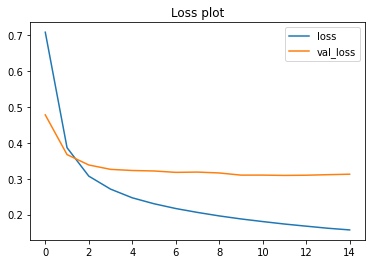

In [26]:
plt.title("Loss plot")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

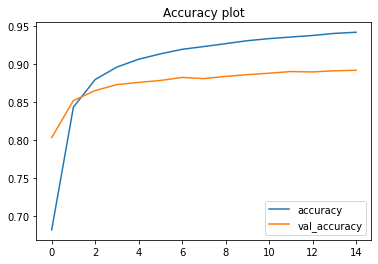

In [27]:
plt.title("Accuracy plot")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

### Testset performance 

In [36]:
match = 0
total = 0
for (word, pos), act in test_loader:
    y_act, y_pred = np.argmax(act, axis=1), np.argmax(model.predict([word, pos]), axis=1)
    match += np.sum(y_act == y_pred)
    total += len(y_pred)

In [38]:
print(f'Test Accuracy: {match/total}')

Test Accuracy: 0.8943309294871795
